(0.0, 5.5, 0.0, 2.0)

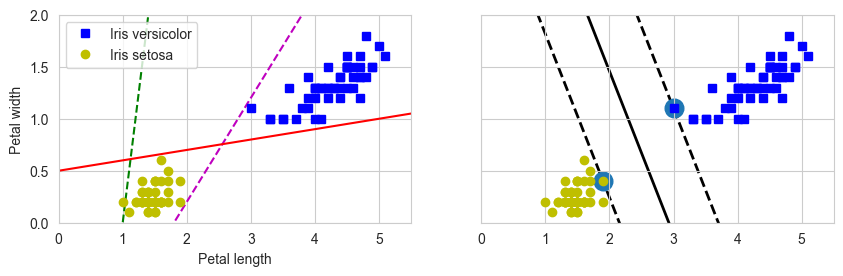

In [1]:
import matplotlib.pyplot as plt

import numpy as np
from sklearn.svm import SVC
from sklearn import datasets
from sympy.printing.pretty.pretty_symbology import line_width

iris = datasets.load_iris(as_frame = True)

X = iris.data[['petal length (cm)', 'petal width (cm)']].values
y = iris.target

setosa_or_versicolor = ((y==0) | (y==1))
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]


svm_clf = SVC(kernel='linear', C = 1e100)
svm_clf.fit(X, y)

x0 = np.linspace(0, 5.5, 200)
pred1 = 5 * x0 - 5
pred2 = x0 - 1.8
pred3 = 0.1 * x0 + 0.5


def plot_svc_decision_boundery(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary w0 * x0 + w1*x1 + b =0
    # => x1 = w0/w1 * x0 -b/w1
    x0 = np.linspace(xmin, xmax,200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    svs = svm_clf.support_vectors_

    plt.plot(x0, decision_boundary, 'k-', linewidth = 2, zorder = -2)
    plt.plot(x0, gutter_up, 'k--', linewidth = 2, zorder = -2)
    plt.plot(x0, gutter_down, 'k--', linewidth = 2, zorder = -2)
    plt.scatter(svs[:, 0], svs[:, 1], s=180, zorder = -1)

fig, axes = plt.subplots(ncols = 2, figsize = (10, 2.7), sharey= True)
plt.sca(axes[0])
plt.plot(x0, pred1, 'g--')
plt.plot(x0, pred2, 'm--')
plt.plot(x0,pred3, 'r-')
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label = 'Iris versicolor')
plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'yo', label = 'Iris setosa')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.axis([0, 5.5, 0, 2])
plt.legend(loc = 'upper left')

plt.sca(axes[1])
plot_svc_decision_boundery(svm_clf, 0, 5.5)
plt.plot(X[:, 0] [y==1], X[:,  1] [y==1], 'bs')
plt.plot(X[:, 0] [y==0], X[:,  1] [y==0], 'yo')
plt.axis([0, 5.5, 0,2])


(-2.0, 2.0, -2.0, 2.0)

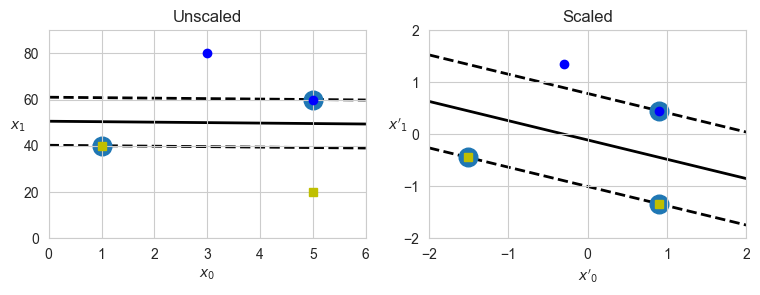

In [2]:
from sklearn.preprocessing import StandardScaler

Xs = np.array([[1, 40], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])

svm_clf = SVC(kernel='linear', C = 100).fit(Xs, ys)

scalar = StandardScaler()
X_scaled = scalar.fit_transform(Xs)
svm_clf_scaled = SVC(kernel='linear', C = 100).fit(X_scaled, ys)

plt.figure(figsize = (9, 2.7))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], 'bo')
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], 'ys')
plot_svc_decision_boundery(svm_clf, 0, 6)
plt.xlabel("$x_0$")
plt.ylabel("$x_1$", rotation = 0)
plt.title("Unscaled")
plt.axis([0, 6, 0, 90])


plt.subplot(122)
plt.plot(X_scaled[:, 0][ys== 1], X_scaled[:, 1][ys==1], 'bo')
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], 'ys')
plot_svc_decision_boundery(svm_clf_scaled, -2, 2)
plt.xlabel("$x'_0$")
plt.ylabel("$x'_1$", rotation = 0)
plt.title('Scaled')
plt.axis([-2, 2, -2, 2])

Text(3, 0.5, 'Outlier')

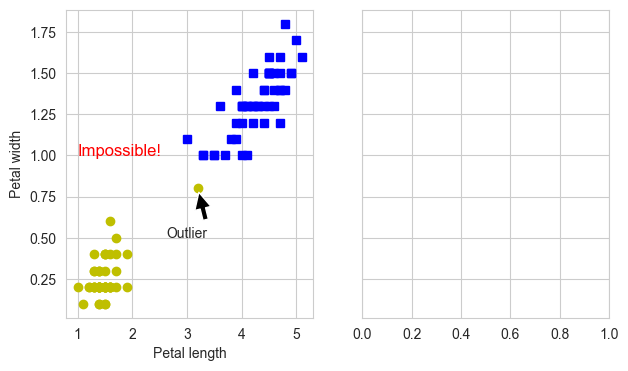

In [36]:
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outlies = np.array([0, 0])
Xo1 = np.concatenate([X, X_outliers[:1]], axis = 0)
yo1 = np.concatenate([y, y_outlies[:1]], axis = 0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis = 0)
yo2 = np.concatenate([y, y_outlies[1:]], axis = 0)

svm_clf = SVC(kernel='linear', C = 10**9)
svm_clf.fit(Xo2, yo2)

fig, axes = plt.subplots(ncols = 2, figsize = (7, 4), sharey = True)

plt.sca(axes[0])
plt.plot(Xo1[:, 0][yo1 ==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo2[:, 0][yo2 ==0], Xo2[:, 1][yo2 == 0], "yo")
plt.text(1, 1.0, "Impossible!", color = 'red', fontsize = 12)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.annotate(
    "Outlier",
        xy = (X_outliers[1][0], X_outliers[1][1]),
        xytext = (3, 0.5),
        ha = 'center',
        arrowprops=dict(facecolor = 'black', shrink = 0.1))



In [40]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.pipeline import  make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target==2)
svm_clf = make_pipeline(StandardScaler(),
                        LinearSVC(C = 1, dual=True, random_state=2))
svm_clf.fit(X, y)

,steps,"[('standardscaler', ...), ('linearsvc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,loss,'squared_hinge'
,dual,True
,tol,0.0001


In [41]:
X_new = [[5.5, 1.7], [5.0, 1.5]]
svm_clf.predict(X_new)

array([ True, False])

In [42]:
svm_clf.decision_function(X_new)

array([ 0.66163952, -0.22035818])

In [50]:
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train SVM on scaled data
svm_clf = LinearSVC(C=1, max_iter=10_000, dual=True, random_state=42)
svm_clf.fit(X_scaled, y)

# Undo scaling
w_scaled = svm_clf.coef_[0]
b_scaled = svm_clf.intercept_[0]

# Recover unscaled weights and bias
w_unscaled = w_scaled / scaler.scale_
b_unscaled = b_scaled - np.dot(scaler.mean_ / scaler.scale_, w_scaled)

# Set back to the model
svm_clf.coef_ = np.array([w_unscaled])
svm_clf.intercept_ = np.array([b_unscaled])

# Compute support vector indices for both models
t = y * 2 - 1  # Convert labels from {0, 1} to {-1, 1}
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

# Plot both models
fig, axes = plt.subplots(ncols=2, figsize=(10, 2.7), sharey=True)

# Plot for svm_clf1
plt.sca(axes[0])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'g^', label='Iris virginica')
plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'bs', label='Iris versicolor')
plot_svc_decision_boundary(svm_clf1, 4, 5.59)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.legend(loc="upper left")
plt.title(f"$C = {svm_clf1.C}$")
plt.axis([4, 5.9, 0.8, 2.8])
plt.grid()

# Plot for svm_clf2
plt.sca(axes[1])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 5.99)
plt.xlabel("Petal length")
plt.title(f"$C = {svm_clf2.C}$")
plt.axis([4, 5.9, 0.8, 2.8])
plt.grid()

save_fig("regularization_plot")
plt.show()

NameError: name 'w1' is not defined